# <p><center style="font-family:newtimeroman;font-size:180%;">Prediction Of Ticket Cancellation by XGBoost Classifier</center></p>
### Table of contents:

* [Introduction](#1)
* [Import Libraries](#2)
* [Import Dataset](#3)
* [Preprocessing & Feature Engineering](#4)
* [Train XGBoost Model](#5)
* [Evaluate The Model](#6)
* [Save Model](#7)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Introduction</p>

## Introduction Of Problem
In this exercise, our goal is to predict whether users will cancel their tickets or not. Each cancellation imposes a fine on the ticket registration site from the passenger company. Therefore, identifying tickets that are likely to be canceled is crucial for effective risk management within the company.
Using the available data, we will train a model to accurately detect trip cancellations.

## Introduction Of Dataset

The dataset contains various information about passengers who have registered for a trip through a travel booking website. Here is a description of the columns in the dataset:

Created: The timestamp indicates the ticket registration time.

CancelTime: The timestamp when the passenger canceled the ticket, if applicable.

DepartureTime: The scheduled departure time for the trip.

BillID: The unique identifier for the purchase transaction.

TicketID: The unique identifier for the ticket.

ReserveStatus: The payment status of the customer.

UserID: The unique identifier for the user.

Male: Indicates whether the ticket belongs to a male passenger or not.

Price: The ticket price without any discounts.

CouponDiscount: The discount applied by the passenger on the ticket.

From: The origin of the trip.

To: The destination of the trip.

Domestic: Indicates whether the trip is domestic or international.

VehicleType: Specifies details about the mode of transportation.

VehicleClass: Indicates whether the vehicle is first class or not.

Vehicle: Specifies the type of vehicle.

Cancel: Indicates whether the ticket has been canceled or not.

HashPassportNumber_p: Hashed version of the passport number.

HashEmail: Hashed version of the email address.

BuyerMobile: Hashed version of the buyer's mobile number.

NationalCode: Hashed version of the national identification number.

TripReason: The reason for the trip.

This dataset provides valuable insights into passenger travel patterns, booking behavior, and trip cancellations, which can be used for various analyses and predictions in the travel industry.


<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
train_data = pd.read_csv('/kaggle/input/classification-of-travel-purpose/train_data.csv', parse_dates=['Created','DepartureTime','CancelTime'],encoding='utf-8')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Created               101017 non-null  datetime64[ns]
 1   CancelTime            15326 non-null   datetime64[ns]
 2   DepartureTime         101017 non-null  datetime64[ns]
 3   BillID                101017 non-null  int64         
 4   TicketID              101017 non-null  float64       
 5   ReserveStatus         101017 non-null  int64         
 6   UserID                42543 non-null   float64       
 7   Male                  101017 non-null  bool          
 8   Price                 101017 non-null  float64       
 9   CouponDiscount        101017 non-null  float64       
 10  From                  101017 non-null  object        
 11  To                    101017 non-null  object        
 12  Domestic              101017 non-null  int64         
 13 

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Preprocessing and Feature Engineering </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [3]:
# delete duplicated rows in dataset
def duplicated_rows(df):
    df=df.drop_duplicates(keep='first')
    return df

train_data= duplicated_rows(train_data)

In [4]:
#delete effectless_cols

def Del_Effectless_Cols(data):
    for col in ['UserID','NationalCode','BuyerMobile','HashEmail','CancelTime','HashPassportNumber_p','VehicleType','VehicleClass']: 
        data = data.drop(labels=col, inplace=False, axis=1)
    return data
        
train_data = Del_Effectless_Cols(train_data)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101015 entries, 0 to 101016
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created         101015 non-null  datetime64[ns]
 1   DepartureTime   101015 non-null  datetime64[ns]
 2   BillID          101015 non-null  int64         
 3   TicketID        101015 non-null  float64       
 4   ReserveStatus   101015 non-null  int64         
 5   Male            101015 non-null  bool          
 6   Price           101015 non-null  float64       
 7   CouponDiscount  101015 non-null  float64       
 8   From            101015 non-null  object        
 9   To              101015 non-null  object        
 10  Domestic        101015 non-null  int64         
 11  TripReason      101015 non-null  object        
 12  Vehicle         101015 non-null  object        
 13  Cancel          101015 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float

In [6]:
# split dataset to train and validation
y=train_data.Cancel
x=train_data.drop(columns='Cancel')

x_train ,x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=24) 

In [7]:
# manag outlier in CouponDiscount
x_train.CouponDiscount.describe()
x_train.loc[((x_train.CouponDiscount <0) | (x_train.CouponDiscount == max(x_train.CouponDiscount))) , 'CouponDiscount']= 0

In [8]:
# Combine 'From' and 'To' columns to create a list of all cities
all_cities = train_data['From'].tolist() + train_data['To'].tolist()

# Create a set of unique cities and convert it back to a list
unique_cities = list(set(all_cities))

# Create a LabelEncoder instance
city_encoder = LabelEncoder()

# Fit the encoder on the unique cities
city_encoder.fit(unique_cities)

# Transform the 'From' and 'To' columns in the training data
x_train['From_encoded'] = city_encoder.transform(x_train['From'])
x_train['To_encoded'] = city_encoder.transform(x_train['To'])

# Fill missing values with -1
x_train['From_encoded'].fillna(-1, inplace=True)
x_train['To_encoded'].fillna(-1, inplace=True)

# Transform the 'From' and 'To' columns in the validation data
x_val['From_encoded'] = city_encoder.transform(x_val['From'])
x_val['To_encoded'] = city_encoder.transform(x_val['To'])

# Fill missing values with -1
x_val['From_encoded'].fillna(-1, inplace=True)
x_val['To_encoded'].fillna(-1, inplace=True)

#delete cols
x_train = x_train.drop(labels=['From','To'], axis=1)
x_val = x_val.drop(labels=['From','To'], axis=1)


In [9]:
def label_encode_boolean_column(df, column_name):
    df.loc[df[column_name] == True, column_name] = 1
    df.loc[df[column_name] == False, column_name] = 0
    df[column_name] = df[column_name].astype(int)
    return df

x_train = label_encode_boolean_column(x_train, 'Male')
x_val = label_encode_boolean_column(x_val, 'Male')


In [10]:
# encoding Vehicle & TripReason
def encode_col(df, col):
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    return df
    
x_train= encode_col(x_train, 'Vehicle') 
x_val= encode_col(x_val, 'Vehicle') 
x_train= encode_col(x_train, 'TripReason') 
x_val= encode_col(x_val, 'TripReason') 


In [11]:
def calculate_days_difference(df):
    df['Days_Difference'] = (df['DepartureTime'] - df['Created']).dt.days
    df.drop(columns=['DepartureTime','Created'], inplace=True, axis=1)
    return df

x_train = calculate_days_difference(x_train)
x_val = calculate_days_difference(x_val)

In [12]:
def add_family_member_feature(df):

    grouped_data = df.groupby('BillID')['Male'].nunique().reset_index()
    grouped_data = grouped_data.rename(columns={'Male': 'Family_Members'})
    df = pd.merge(df, grouped_data, on='BillID', how='left')
    
    return df

x_train = add_family_member_feature(x_train)
x_val = add_family_member_feature(x_val)

In [13]:
def count_tickets_per_order(df):
    # Group data by "BillId" and count the number of distinct values in "TicketId" column
    ticket_counts = df.groupby('BillID')['TicketID'].nunique().reset_index()
    # Rename the column
    ticket_counts = ticket_counts.rename(columns={'TicketID': 'Ticket_Count'})
    # Merge the ticket counts with the original data
    df = pd.merge(df, ticket_counts, on='BillID', how='left')
    
    return df

x_train = count_tickets_per_order(x_train)
x_val = count_tickets_per_order(x_val)

In [14]:
# feature scaling
scaler=StandardScaler()
x_v=x_val.values
scaled_x=scaler.fit_transform(x_train)
scaled_v=scaler.transform(x_v)

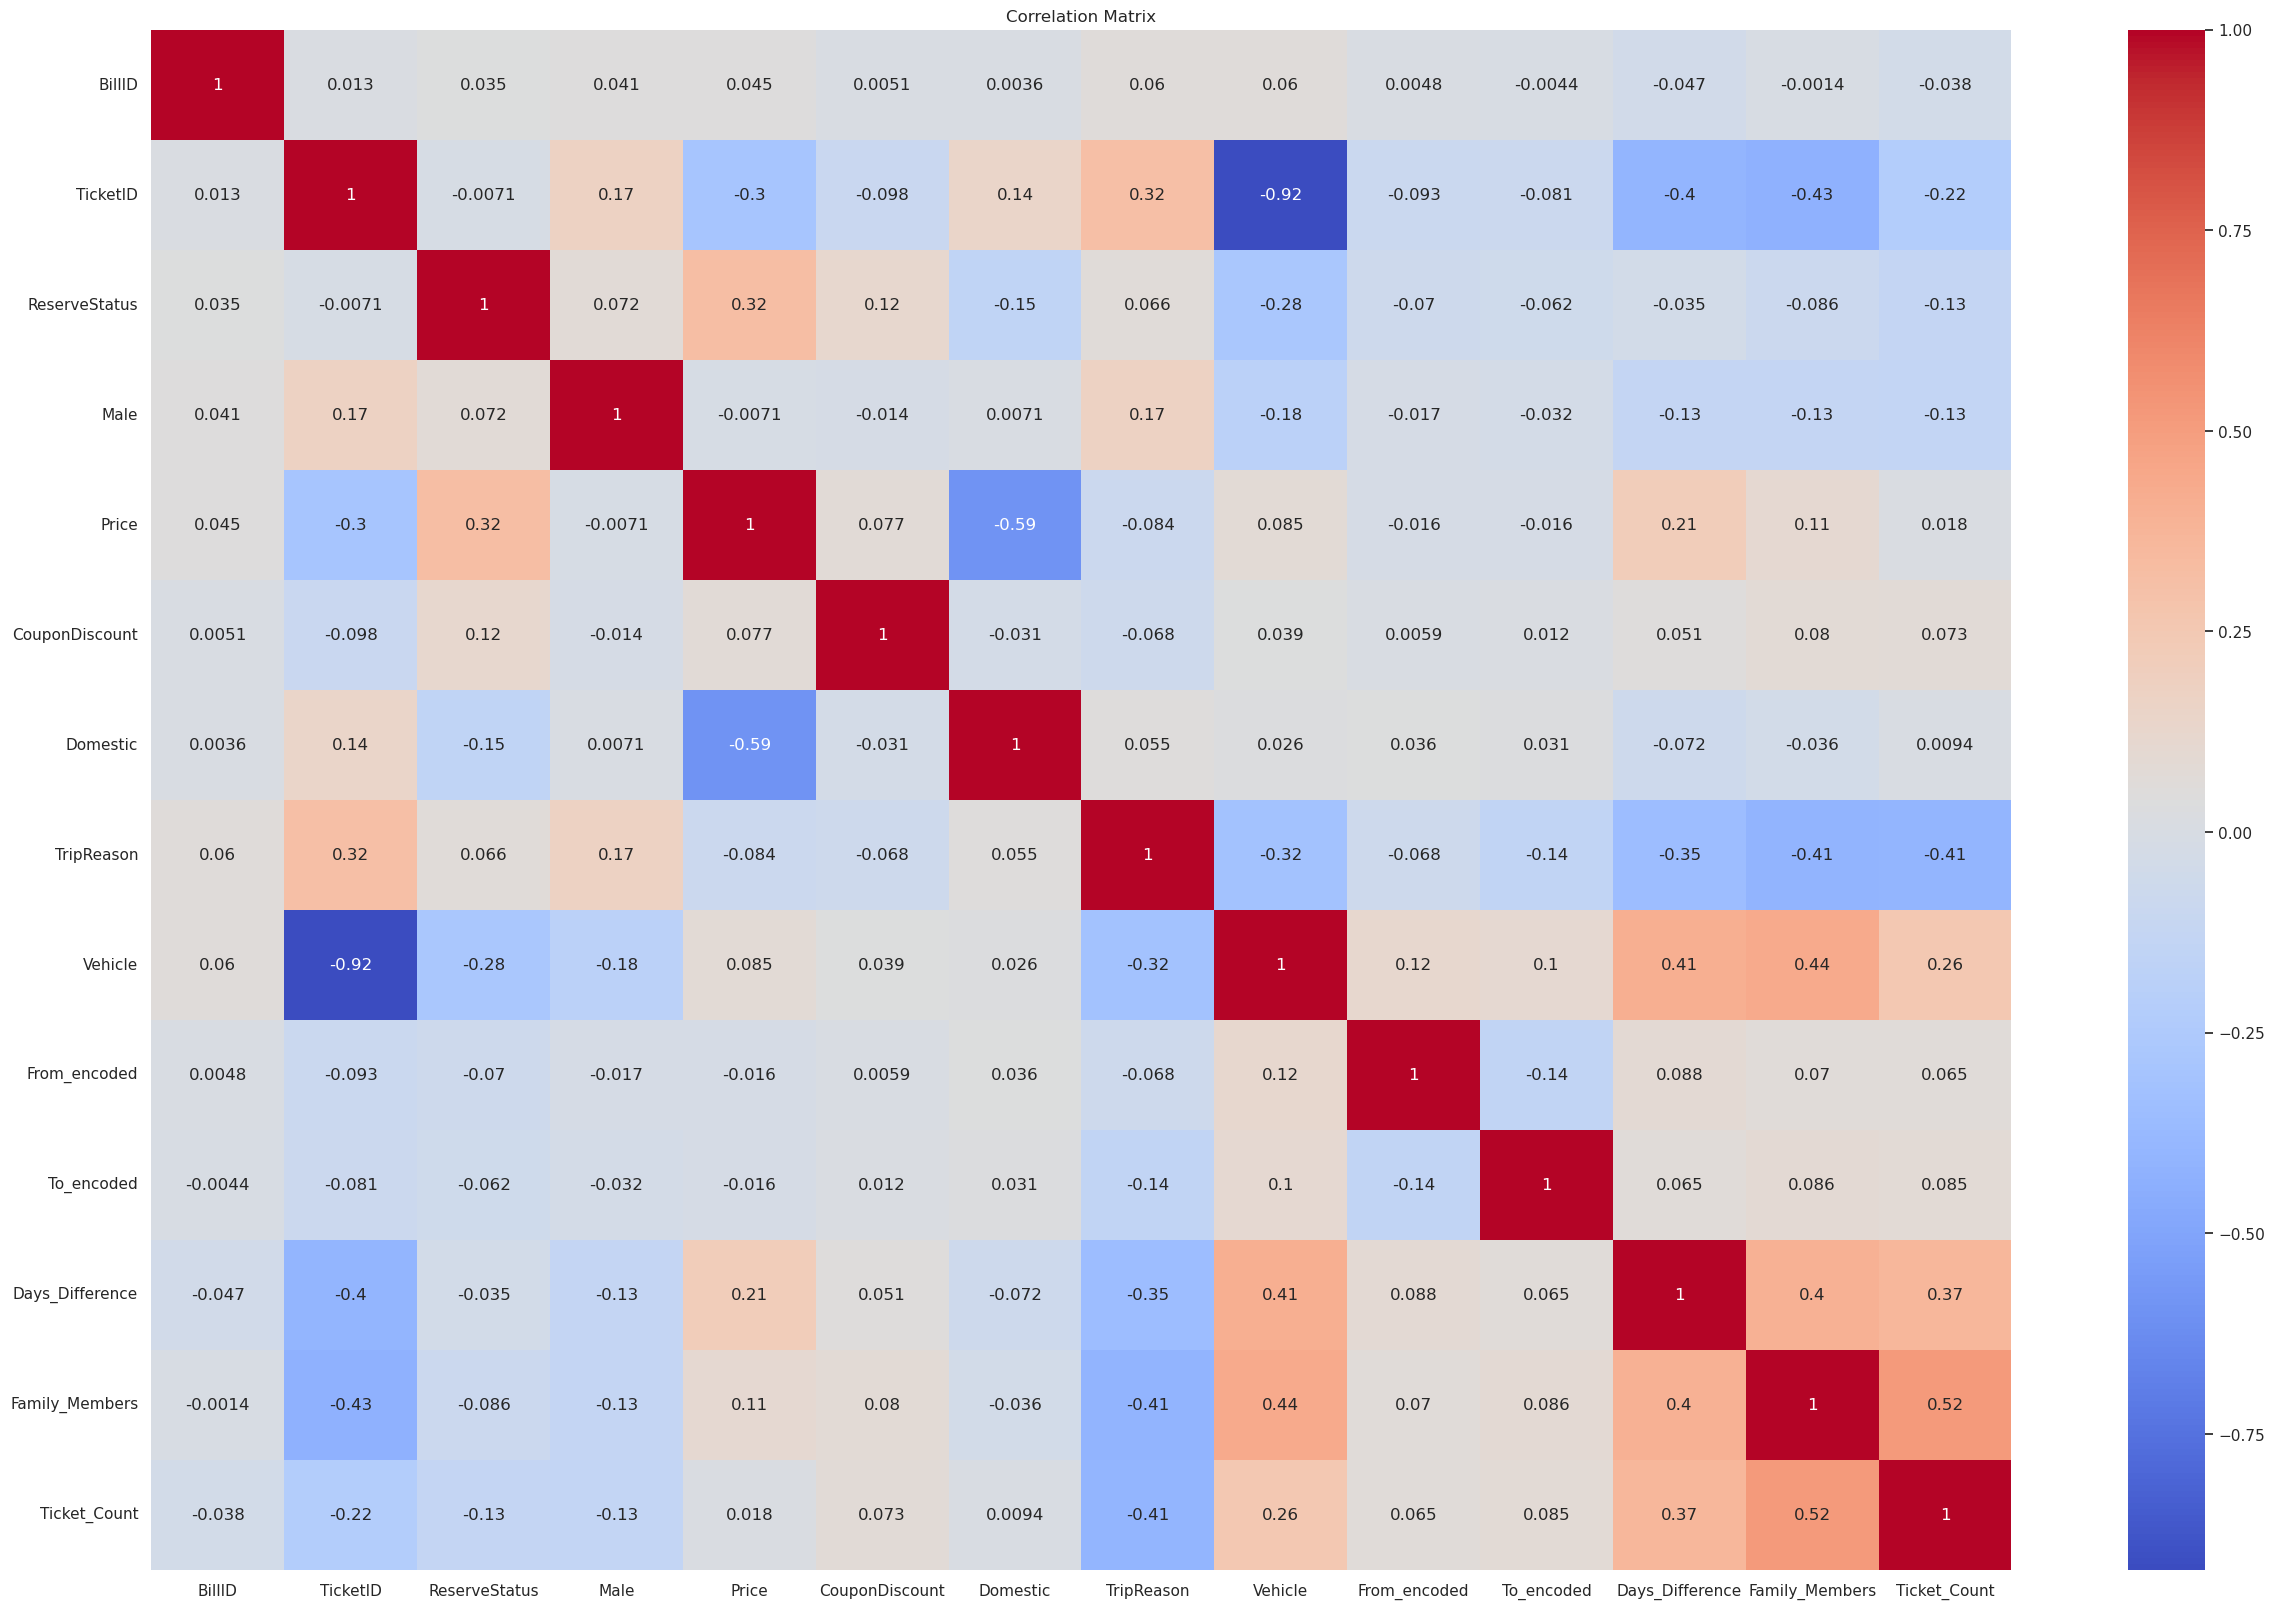

In [15]:
# Calculate the correlation matrix
corr_matrix =x_train.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Train XGBoost Model </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
# Define the XGBoost model
model = XGBClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5],
    'colsample_bylevel' : [0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5,7],
}


# Perform grid search to find the best hyperparameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(scaled_x,y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

In [16]:
# setup hyperparameters for XGBClassifier
model = XGBClassifier(booster= 'gbtree', learning_rate= 0.1, max_depth= 5, n_estimators=150, colsample_bylevel= 0.5, colsample_bytree=0.5, min_child_weight=1)
model.fit(scaled_x, y_train)
y_pred = model.predict(scaled_v)

# define the evaluation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# evaluate the model on the dataset
n_scores = cross_val_score(model, scaled_x, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(scaled_x, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(scaled_v, y_val)))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Accuracy: 0.983 (0.002)
Accuracy score (training): 0.984
Accuracy score (validation): 0.983


<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

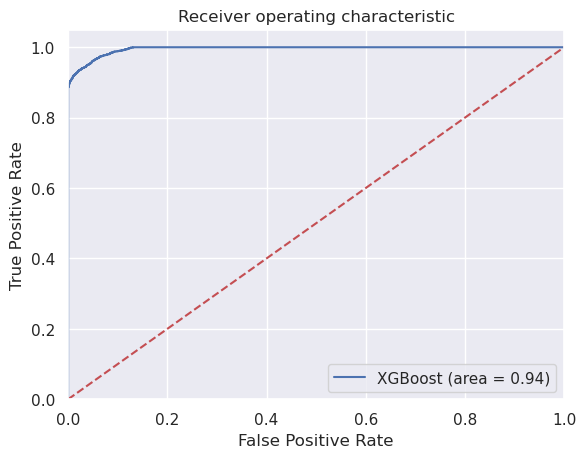

In [17]:
# ROC Curve
GXB_roc_auc = roc_auc_score(y_val, model.predict(scaled_v))
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(scaled_v)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % GXB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

In [18]:
# evaluate model
#Confusion matrix, Accuracy, sensitivity and specificity

print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred,pos_label=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17179
           1       1.00      0.88      0.94      3024

    accuracy                           0.98     20203
   macro avg       0.99      0.94      0.96     20203
weighted avg       0.98      0.98      0.98     20203

Confusion Matrix : 
 [[17177     2]
 [  349  2675]]
Sensitivity :  0.9998835787880552
Specificity :  0.8845899470899471
f1 score: 0.9384318540606911


<Axes: >

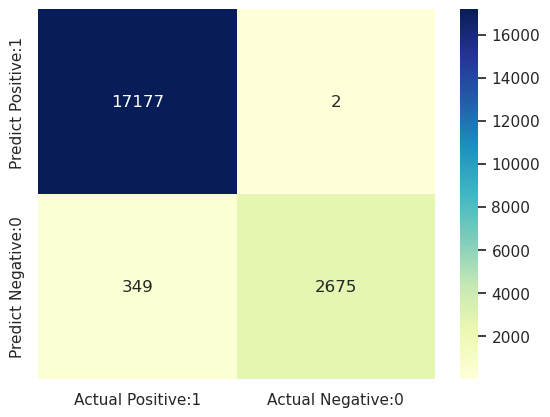

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')